Reading the data

In [ ]:
import pandas as pd
import seaborn as sns

df_flight_priceline = pd.read_csv('(add your data file string here)', low_memory=False)

# Make a copy of the DataFrame and name it 'df'
df = df_flight_priceline.copy()

# Print the data types of the columns in the DataFrame 'df'
print(df.dtypes)

Airline name             object
Travel  Time             object
Unnamed: 2              float64
Number of  Stoppage      object
Ticket prize(Doller)     object
                         ...   
Unnamed: 490            float64
Unnamed: 491             object
Unnamed: 492             object
Unnamed: 493             object
Unnamed: 494             object
Length: 495, dtype: object


Converting Numeric Columns to Correct Data Types:

In [ ]:
df['Ticket prize(Doller)'] = pd.to_numeric(df['Ticket prize(Doller)'], errors='coerce')


In [ ]:
df['Ticket prize(Doller)'].fillna(0, inplace=True)  # Fill NaN with 0
# or
df['Ticket prize(Doller)'].interpolate(inplace=True)  # Interpolate NaN values

df['Number of  Stoppage '].interpolate(inplace=True)  # Interpolate NaN values

df['Airline name '].interpolate(inplace=True)  # Interpolate NaN values

In [ ]:
# Print all column names in the DataFrame
print(df.columns)



Index(['Airline name ', 'Travel  Time', 'Unnamed: 2', 'Number of  Stoppage ',
       'Ticket prize(Doller)', 'Depreture  Airport', 'Depreture Time',
       '1st Stoppage Waiting Hour', '1st Stoppage', '2nd StoppageWaiting Time',
       ...
       'Unnamed: 485', 'Unnamed: 486', 'Unnamed: 487', 'Unnamed: 488',
       'Unnamed: 489', 'Unnamed: 490', 'Unnamed: 491', 'Unnamed: 492',
       'Unnamed: 493', 'Unnamed: 494'],
      dtype='object', length=495)


In [ ]:
#printing the unique values of Airline names and Travel time
airline_names = df['Airline name '].unique()
travel_times = df['Travel  Time'].unique()

print("Airline Names:")
print(airline_names)

print("\nTravel Times:")
print(travel_times)

Airline Names:
['Emirates' 'Turkish' 'Kuwait' 'Etihad' 'Multiple' 'Qatar' 'British'
 'American' 'Finnair' 'Air India' 'Cathay Pacific' 'Gulf Air Company'
 'Singapore' 'Asiana' 'ANA All Nippon' 'Ethiopian' 'United' 'Delta'
 'Korean' 'Royal Jordanian' 'Japan' 'Iberia' 'Vistara' 'EVA'
 'KLM-Royal Dutch' 'China Southern' 'Air France' 'SWISS' 'Qantas'
 'Lufthansa' 'Oman' 'Srilankan' 'Saudia' 'Austrian' 'Air China'
 'TAP Portugal' 'LOT Polish' 'Aer Lingus' 'Icelandair' 'Air Canada'
 'Virgin Atlantic' "That's 6% off the retail price" nan 'Kenya' 'Egyptair'
 'Royal Air Maroc' 'Philippine' 'SpiceJet' 'IndiGo' 'Flydubai'
 'Hahn Air Systems' 'Flynas' 'GoFirst' 'Flexflight' 'Malaysian' 'Malindo'
 'APG Airilines' 'Himalaya']

Travel Times:
['51h 15m' '57h 25m' '26h 5m' '21h 15m' '22h 35m' '27h 15m' '35h 50m'
 '27h 0m' '43h 50m' '38h 45m' '22h 45m' '27h 35m' '34h 15m' '35h 45m'
 '36h 40m' '37h 0m' '28h 55m' '29h 40m' '33h 25m' '42h 40m' '50h 30m'
 '21h 55m' '45h 49m' '46h 27m' '48h 20m' '50h 32m' '5

In [ ]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

# Print all column names without trailing spaces
print(df.columns)

# Print the first five rows of the DataFrame for further inspection
print(df.head())


Index(['Airline name', 'Travel  Time', 'Unnamed: 2', 'Number of  Stoppage',
       'Ticket prize(Doller)', 'Depreture  Airport', 'Depreture Time',
       '1st Stoppage Waiting Hour', '1st Stoppage', '2nd StoppageWaiting Time',
       ...
       'Unnamed: 485', 'Unnamed: 486', 'Unnamed: 487', 'Unnamed: 488',
       'Unnamed: 489', 'Unnamed: 490', 'Unnamed: 491', 'Unnamed: 492',
       'Unnamed: 493', 'Unnamed: 494'],
      dtype='object', length=495)
  Airline name Travel  Time  Unnamed: 2 Number of  Stoppage  \
0     Emirates      51h 15m         NaN             2 Stops   
1     Emirates      57h 25m         NaN             2 Stops   
2      Turkish       26h 5m         NaN              1 Stop   
3       Kuwait      21h 15m         NaN              1 Stop   
4       Etihad      22h 35m         NaN              1 Stop   

   Ticket prize(Doller) Depreture  Airport Depreture Time  \
0                1156.0                DAC         01:40a   
1                1156.0                DAC   

dropping unNamed columns


In [ ]:
# Drop all columns starting with 'Unnamed:'
df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]
print(df)


     Airline name Travel  Time Number of  Stoppage  Ticket prize(Doller)  \
0        Emirates      51h 15m             2 Stops                1156.0   
1        Emirates      57h 25m             2 Stops                1156.0   
2         Turkish       26h 5m              1 Stop                1175.0   
3          Kuwait      21h 15m              1 Stop                1264.0   
4          Etihad      22h 35m              1 Stop                1283.0   
...           ...          ...                 ...                   ...   
2456      British      47h 35m             2 Stops                2654.0   
2457     Multiple      19h 15m             2 Stops                3307.0   
2458     Multiple      23h 30m             2 Stops                3606.0   
2459     Multiple      23h 30m             2 Stops                3606.0   
2460     Multiple      22h 10m             2 Stops                3993.0   

     Depreture  Airport Depreture Time 1st Stoppage Waiting Hour 1st Stoppage  \
0     

bar graph for Airlines: A bar graph is shown the distribution of flights among different airlines.

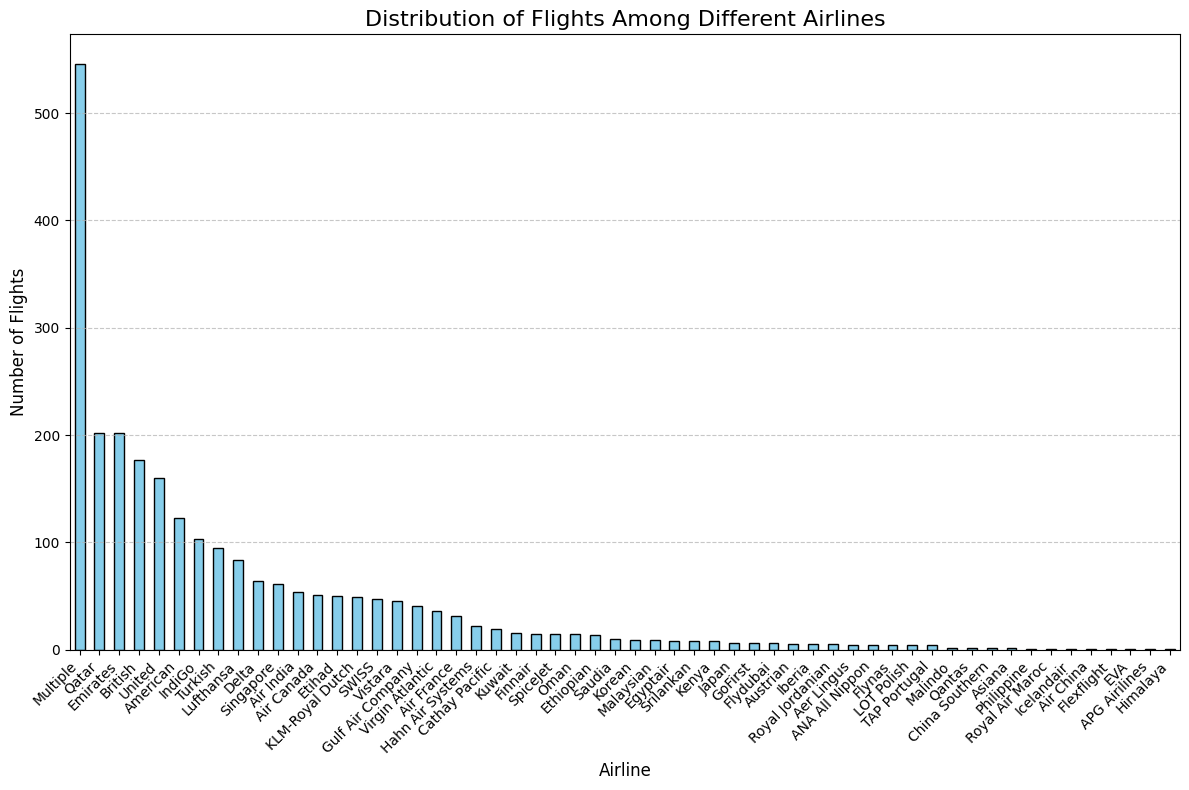

In [ ]:
import matplotlib.pyplot as plt

# Filter out the row where the airline name is "That's 6% off the retail price"
df_filtered = df[df['Airline name'] != "That's 6% off the retail price"]

# Calculate the counts of flights for each airline after filtering
airline_counts = df_filtered['Airline name'].value_counts()

# Sort the airlines by counts in descending order for better visualization
airline_counts_sorted = airline_counts.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))  # Set the figure size
airline_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')  # Create the bar chart
plt.title('Distribution of Flights Among Different Airlines', fontsize=16)  # Set the title with larger font size
plt.xlabel('Airline', fontsize=12)  # Set the x-axis label with a larger font size
plt.ylabel('Number of Flights', fontsize=12)  # Set the y-axis label with a larger font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability and set font size
plt.yticks(fontsize=10)  # Set font size for y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()  # Show the plot


Number of flights departure from the airport

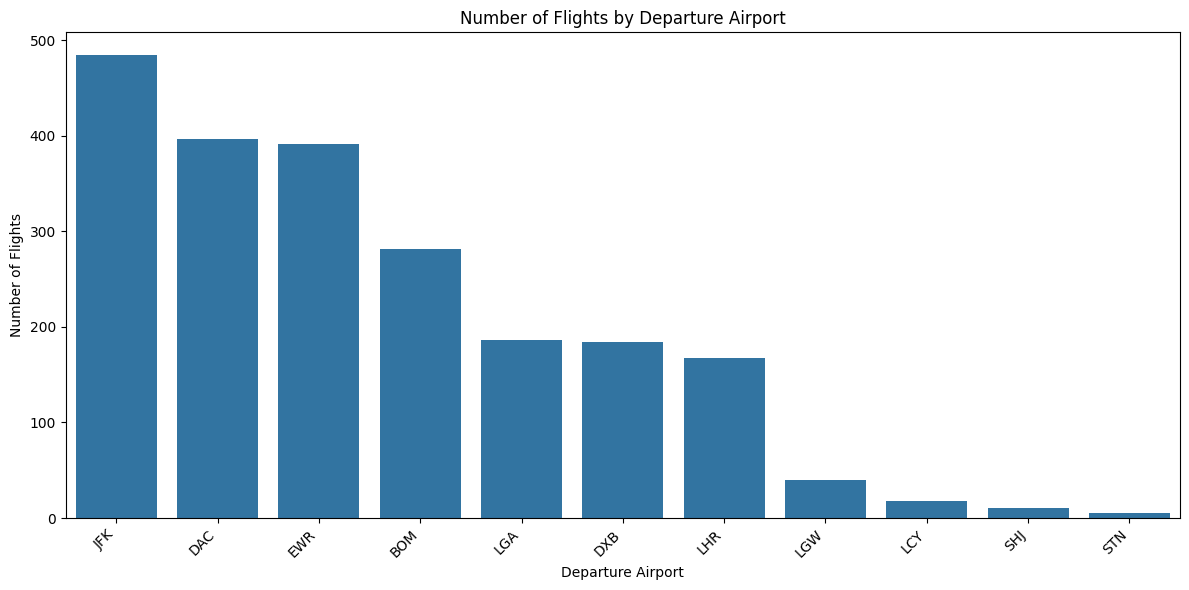

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the countplot for departure airports
sns.countplot(x='Depreture  Airport', data=df, order=df['Depreture  Airport'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Number of Flights by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Number of Flights')

# Show the plot
plt.tight_layout()
plt.show()


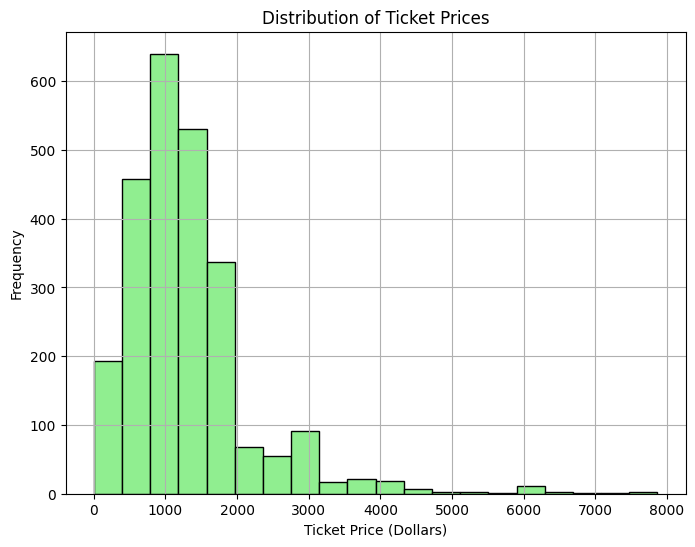

In [ ]:
# Plotting a histogram for 'Ticket prize(Doller)' column
plt.figure(figsize=(8, 6))
plt.hist(df['Ticket prize(Doller)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price (Dollars)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


print all columns

In [ ]:
print(df.columns)


Index(['Airline name', 'Travel  Time', 'Number of  Stoppage',
       'Ticket prize(Doller)', 'Depreture  Airport', 'Depreture Time',
       '1st Stoppage Waiting Hour', '1st Stoppage', '2nd StoppageWaiting Time',
       '2nd Stoppage', '3rd Stoppage Waiting time', '3rd Stoppage',
       'Destination Airport', 'Arrival Time', 'Arrival Date'],
      dtype='object')


In [ ]:
# Rename columns
df.rename(columns={'Airline name ': 'Airline name', 'Travel  Time': 'Travel Time', 'Number of  Stoppage ': 'Number of Stoppage'}, inplace=True)


Ticket Price Analysis by Airline:
Analyze the ticket prices across different airlines using bar graph.

<ipython-input-31-e99195e81f2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Ticket prize(Doller)'] = df_filtered['Ticket prize(Doller)'].replace('', np.nan)
<ipython-input-31-e99195e81f2d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Ticket prize(Doller)'] = pd.to_numeric(df_filtered['Ticket prize(Doller)'], errors='coerce')


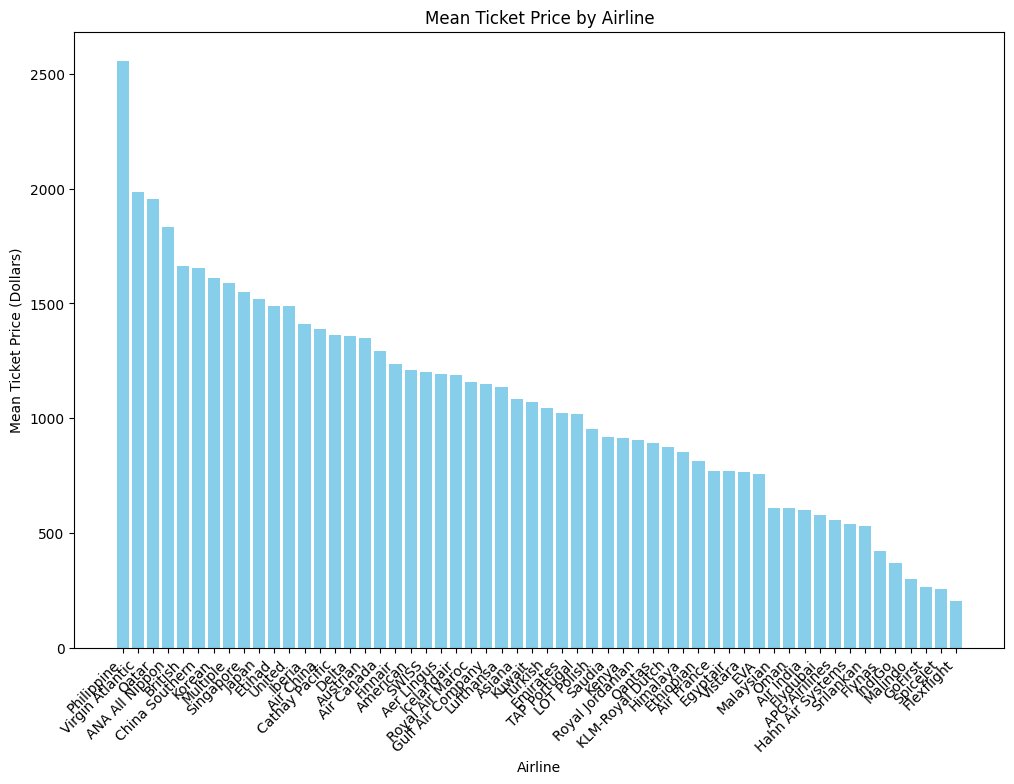

In [ ]:
import numpy as np

# Filter out the row where the airline name is "That's 6% off the retail price"
df_filtered = df[df['Airline name'] != "That's 6% off the retail price"]

# Replace empty strings with NaN in the copied DataFrame
df_filtered['Ticket prize(Doller)'] = df_filtered['Ticket prize(Doller)'].replace('', np.nan)

# Convert the 'Ticket prize(Doller)' column to numeric (float) in the copied DataFrame
df_filtered['Ticket prize(Doller)'] = pd.to_numeric(df_filtered['Ticket prize(Doller)'], errors='coerce')

# Drop rows with NaN values in 'Ticket prize(Doller)' column in the copied DataFrame
df_filtered = df_filtered.dropna(subset=['Ticket prize(Doller)'])

# Calculate mean ticket price for each airline in the copied DataFrame
mean_ticket_price = df_filtered.groupby('Airline name')['Ticket prize(Doller)'].mean().reset_index()

# Sort airlines by mean ticket price in the copied DataFrame
mean_ticket_price = mean_ticket_price.sort_values(by='Ticket prize(Doller)', ascending=False)

# Plotting the bar chart using the copied DataFrame
plt.figure(figsize=(12, 8))
plt.bar(mean_ticket_price['Airline name'], mean_ticket_price['Ticket prize(Doller)'], color='skyblue')
plt.title('Mean Ticket Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Ticket Price (Dollars)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

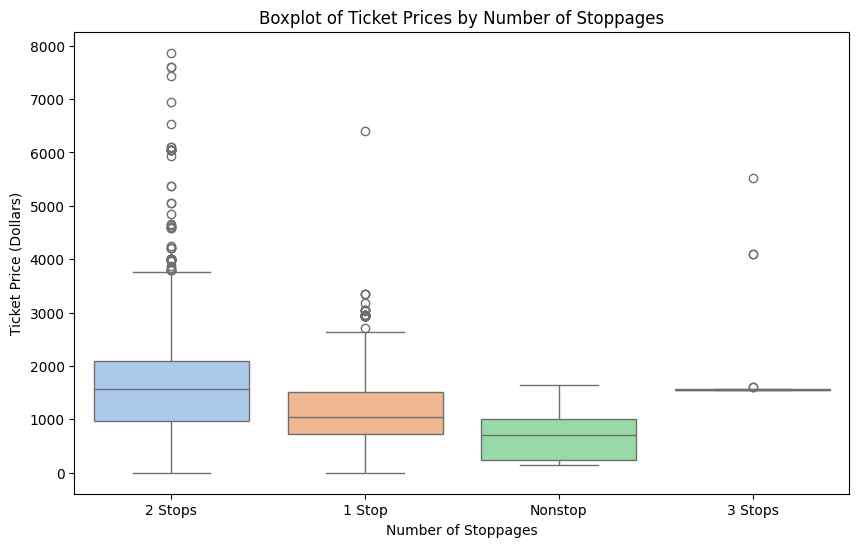

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where the stoppage name is "Express deal"
df_filtered = df[df['Number of  Stoppage'] != "EXPRESS DEAL"]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot with x as hue and legend set to False
sns.boxplot(x='Number of  Stoppage', y='Ticket prize(Doller)', data=df_filtered, hue='Number of  Stoppage', palette='pastel', legend=False)

# Set the title and labels
plt.title('Boxplot of Ticket Prices by Number of Stoppages')
plt.xlabel('Number of Stoppages')
plt.ylabel('Ticket Price (Dollars)')

# Show the plot
plt.show()


In [ ]:
print(df.columns)


Index(['Airline name', 'Travel Time', 'Number of  Stoppage',
       'Ticket prize(Doller)', 'Depreture  Airport', 'Depreture Time',
       '1st Stoppage Waiting Hour', '1st Stoppage', '2nd StoppageWaiting Time',
       '2nd Stoppage', '3rd Stoppage Waiting time', '3rd Stoppage',
       'Destination Airport', 'Arrival Time', 'Arrival Date',
       'Travel Time (minutes)'],
      dtype='object')


Number of Stoppage Distribution:
Visualize the distribution of the number of stoppages for flights.

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns

# Plotting the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Number of  Stoppage', data=filtered_df, palette='pastel')
plt.title('Distribution of Number of Stoppage')
plt.xlabel('Number of Stoppage')
plt.ylabel('Count')
plt.show()


Departure Time Analysis:
Analyze the distribution of departure times using a histogram or density plot.

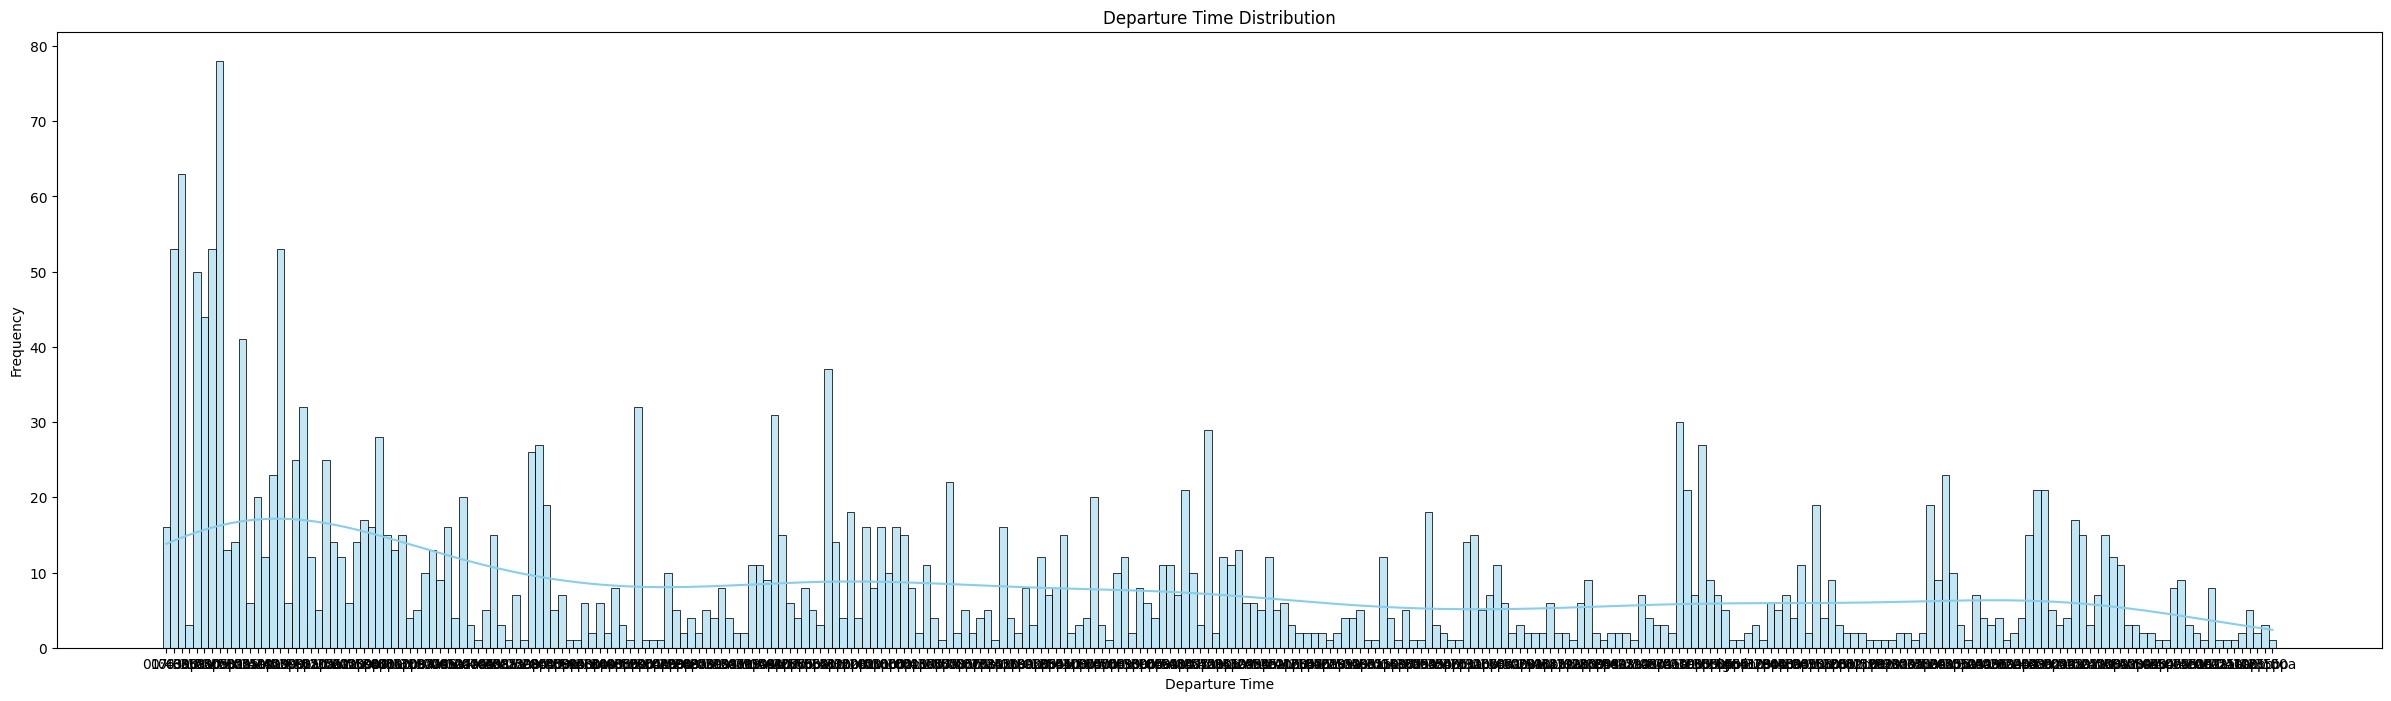

In [ ]:
plt.figure(figsize=(30, 8))
sns.histplot(df['Depreture Time'], bins=20, kde=True, color='skyblue')
plt.title('Departure Time Distribution')
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]


Flight Duration Analysis:
Analyze the distribution of travel times using bar graph.

<ipython-input-72-4a188f6af96b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Travel Time (minutes)'] = df_filtered['Travel Time'].apply(time_to_minutes)


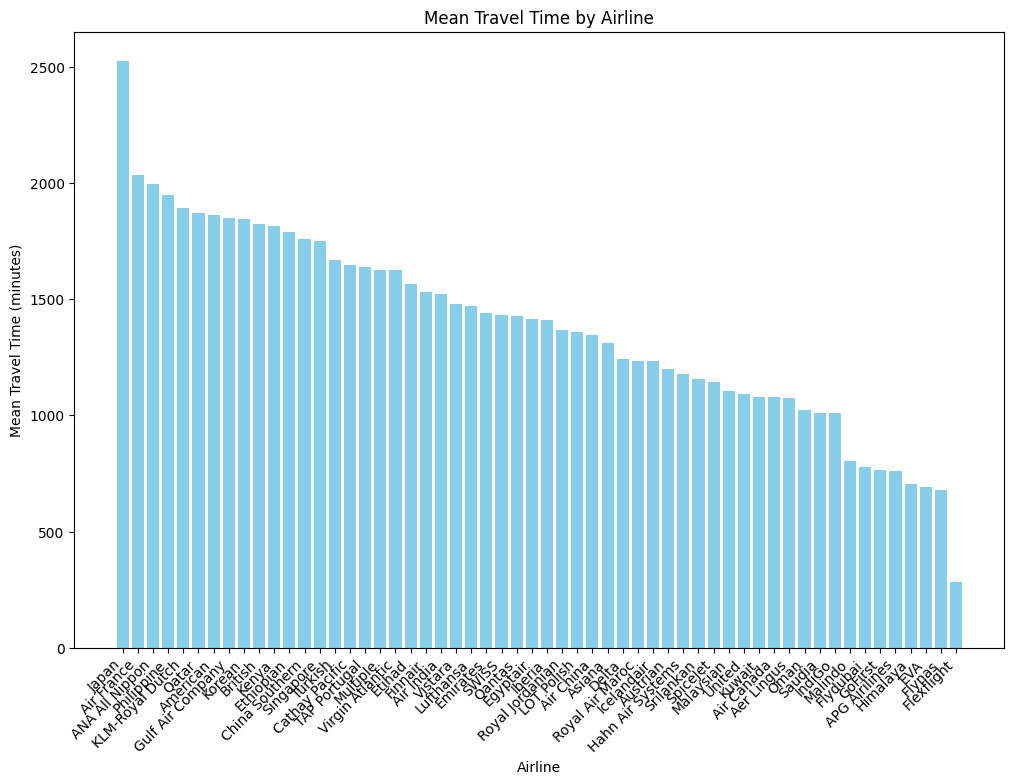

In [ ]:
# Filter out the row where the airline name is "That's 6% off the retail price"
df_filtered = df[df['Airline name'] != "That's 6% off the retail price"]


# Function to convert time string to total minutes
def time_to_minutes(time_str):
    parts = time_str.split()
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part[:-1])
        elif 'm' in part:
            minutes = int(part[:-1])
    return hours * 60 + minutes

# Convert 'Travel Time' column to total minutes
df_filtered['Travel Time (minutes)'] = df_filtered['Travel Time'].apply(time_to_minutes)

# Calculate mean travel time for each airline
mean_travel_time = df_filtered.groupby('Airline name')['Travel Time (minutes)'].mean().reset_index()

# Sort airlines by mean travel time
mean_travel_time = mean_travel_time.sort_values(by='Travel Time (minutes)', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(mean_travel_time['Airline name'], mean_travel_time['Travel Time (minutes)'], color='skyblue')
plt.title('Mean Travel Time by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Travel Time (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Time Series Analysis:
Analyze trends in departure times or ticket prices over time using line plots.

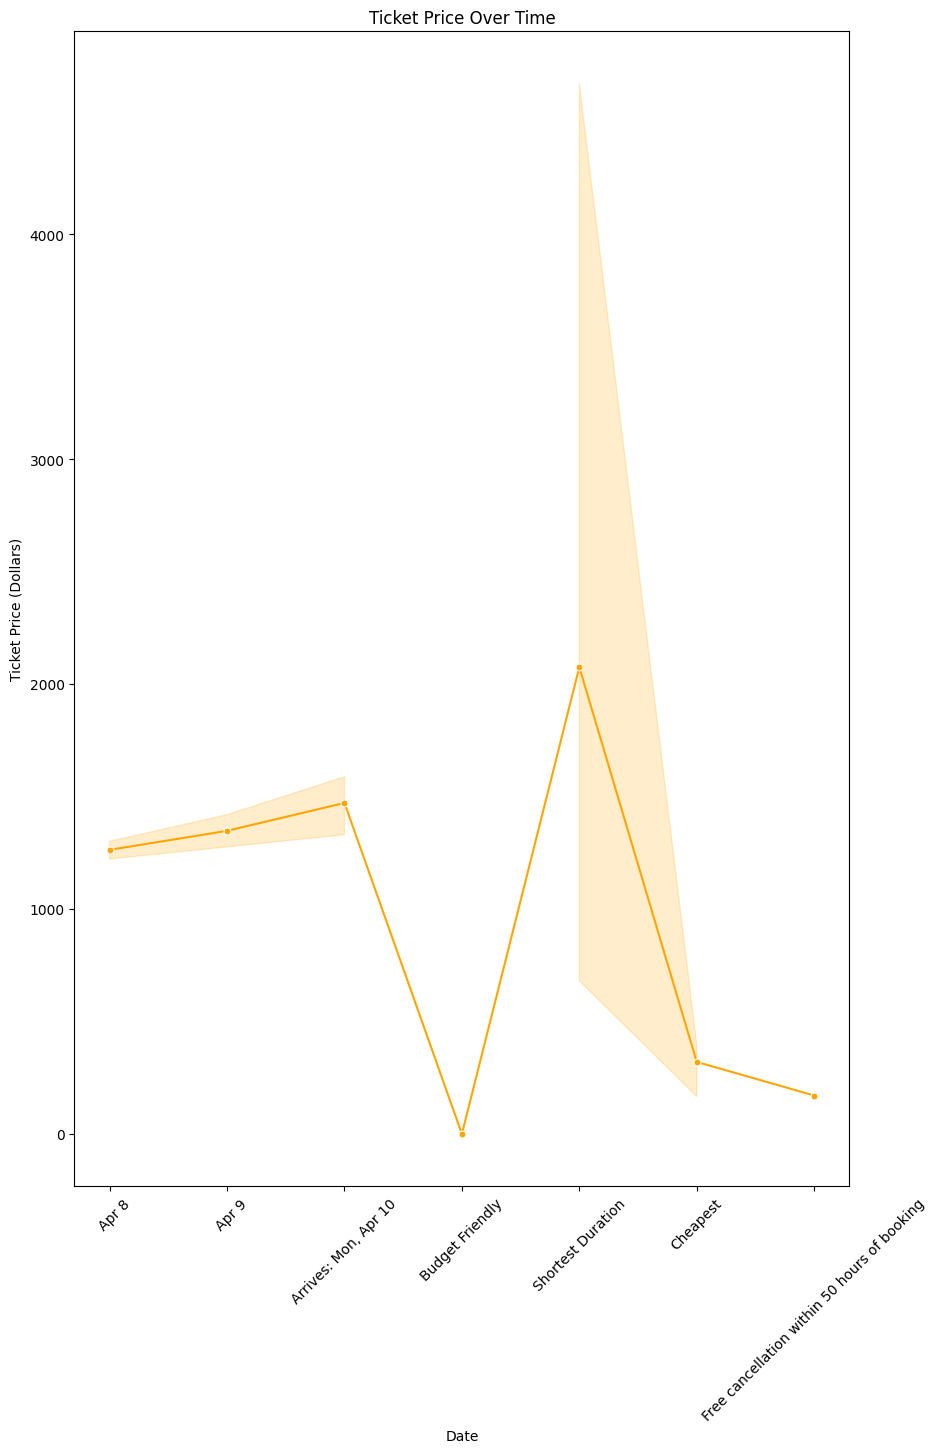

In [ ]:
plt.figure(figsize=(10, 15))
sns.lineplot(x='Arrival Date', y='Ticket prize(Doller)', data=df, marker='o', markersize=5, color='orange')
plt.title('Ticket Price Over Time')
plt.xlabel('Date')
plt.ylabel('Ticket Price (Dollars)')
plt.xticks(rotation=45)
plt.show()


Descriptive Statistics: Explore the basic statistical measures of your data, such as mean, median, mode, standard deviation, etc.

In [ ]:
# Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)


       Ticket prize(Doller)  Travel Time (minutes)
count           2461.000000            2461.000000
mean            1313.334823            1549.802926
std              887.184590             729.446622
min                0.000000               0.000000
25%              765.000000             980.000000
50%             1128.000000            1430.000000
75%             1603.000000            2000.000000
max             7867.000000            4930.000000


Groupby Operations: Group your data by a categorical variable and perform operations such as mean, median, count, etc., within each group.

In [ ]:
# Groupby operation
group_stats = df.groupby('Airline name')['Ticket prize(Doller)'].mean()
print(group_stats)


Airline name
ANA All Nippon                    1833.250000
APG Airilines                      556.000000
Aer Lingus                        1193.500000
Air Canada                        1294.921569
Air China                         1388.000000
Air France                         769.032258
Air India                          600.462963
American                          1209.691057
Asiana                            1084.500000
Austrian                          1350.800000
British                           1663.615819
Cathay Pacific                    1363.105263
China Southern                    1653.500000
Delta                             1359.359375
EVA                                756.000000
Egyptair                           768.875000
Emirates                          1022.559406
Ethiopian                          812.357143
Etihad                            1488.380000
Finnair                           1235.266667
Flexflight                         204.000000
Flydubai             

Ticket price mean, mode, median

In [ ]:
mean_price = df['Ticket prize(Doller)'].mean()
median_price = df['Ticket prize(Doller)'].median()
mode_price = df['Ticket prize(Doller)'].mode()[0]  # In case there are multiple modes, select the first one
std_dev_price = df['Ticket prize(Doller)'].std()
min_price = df['Ticket prize(Doller)'].min()
max_price = df['Ticket prize(Doller)'].max()
q1_price = df['Ticket prize(Doller)'].quantile(0.25)
q3_price = df['Ticket prize(Doller)'].quantile(0.75)

# Print the descriptive statistics
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Q1 Price (25th percentile): {q1_price}")
print(f"Q3 Price (75th percentile): {q3_price}")

Mean Price: 1313.3348232425842
Median Price: 1128.0
Mode Price: 1508.0
Standard Deviation: 887.1845900323754
Minimum Price: 0.0
Maximum Price: 7867.0
Q1 Price (25th percentile): 765.0
Q3 Price (75th percentile): 1603.0


tickets comparsion between two flights

In [ ]:
# Example t-test
from scipy.stats import ttest_ind
group1 = df[df['Airline name'] == 'Air Canada']['Ticket prize(Doller)']
group2 = df[df['Airline name'] == 'Singapore']['Ticket prize(Doller)']
t_stat, p_value = ttest_ind(group1, group2)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



t-statistic: -2.669647101879155
p-value: 0.008743466500639509
Reject the null hypothesis
